# **Advanced Data Visualisation**

## Objectives

* Analyze Key Performance Metrics – Identify which stats (e.g., striking accuracy, takedown defense) impact win percentage.

- Compare Fighter Attributes – Examine how physical attributes like reach-to-height ratio affect success in fights.

- Test Hypotheses – Use statistical tests (T-tests) to validate claims, such as whether heavyweights have a lower win percentage.

- Visualize Fighter Trends – Create clear, advanced visualizations to compare top fighters and uncover patterns in fighting styles.




---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\seebi\\Downloads\\VSCODE_Projects\\Fighter-Statistical-Data\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\seebi\\Downloads\\VSCODE_Projects\\Fighter-Statistical-Data'

---

# Preparing Data for this notebook

---

Loading in the dataset, and ensuring it is ready before creating visualisations

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

file_path = r"C:\Users\Seebi\Downloads\VSCODE_Projects\Fighter-Statistical-Data/ufc-fighters-statistics.csv"
df = pd.read_csv(file_path)   #loading in the dataset




In [6]:
cols_to_fill = [
    "significant_striking_accuracy",
    "significant_strike_defence",
    "average_takedowns_landed_per_15_minutes",
    "takedown_accuracy",
    "takedown_defense",
    "average_submissions_attempted_per_15_minutes"
]

for col in cols_to_fill:
    df[col] = df[col].fillna(df[col].median())  # Reassign the column




In [7]:
df["height_cm"] = df.groupby("weight_in_kg")["height_cm"].transform(lambda x: x.fillna(x.mean()))

df["reach_in_cm"] = df.groupby("height_cm")["reach_in_cm"].transform(lambda x: x.fillna(x.mean()))


In [8]:
df["reach_in_cm"] = df.groupby("height_cm")["reach_in_cm"].transform(lambda x: x.fillna(x.mean()))

df["height_cm"] = df["height_cm"].fillna(df["height_cm"].median())


In [9]:
# Convert date column if applicable
if "date_of_birth" in df.columns:
    df["age"] = 2024 - pd.to_datetime(df["date_of_birth"], errors="coerce").dt.year

# Calculate Reach-to-Height Ratio
df["reach_to_height"] = df["reach_in_cm"] / df["height_cm"]

---

# Advanced Data Visualisation

---

C:\Users\seebi\AppData\Local\Temp\ipykernel_15344\1739523812.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["experience_level"], y=df["win_percentage"], palette="coolwarm")


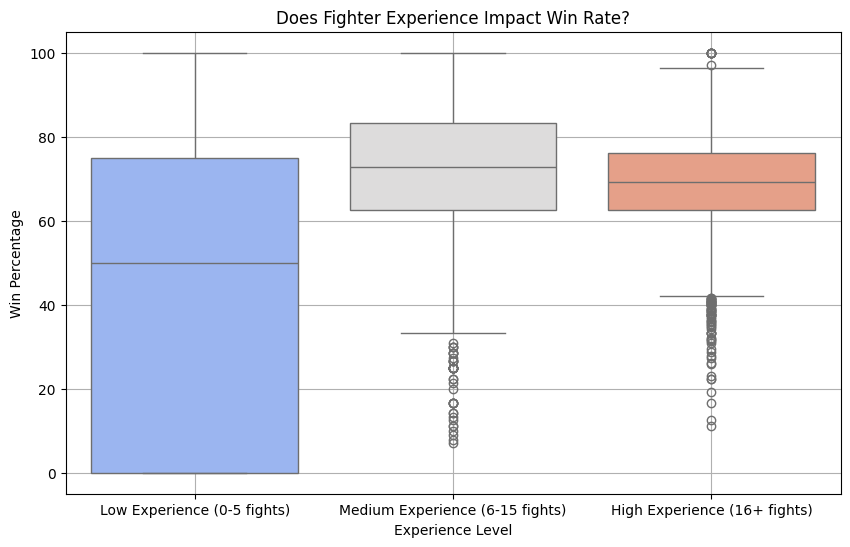

                  experience_level  win_percentage
0      Low Experience (0-5 fights)       42.513856
1  Medium Experience (6-15 fights)       70.852166
2     High Experience (16+ fights)       68.619819


C:\Users\seebi\AppData\Local\Temp\ipykernel_15344\1739523812.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  experience_summary = df.groupby("experience_level")["win_percentage"].mean().reset_index()


In [10]:
# Ensure the required columns exist
if "wins" not in df.columns or "losses" not in df.columns:
    raise ValueError("Required columns missing from dataset")

# Calculate total fights and win percentage
df["total_fights"] = df["wins"] + df["losses"]
df["win_percentage"] = (df["wins"] / df["total_fights"]) * 100

# Define experience levels
bins = [0, 5, 15, float("inf")]
labels = ["Low Experience (0-5 fights)", "Medium Experience (6-15 fights)", "High Experience (16+ fights)"]
df["experience_level"] = pd.cut(df["total_fights"], bins=bins, labels=labels, right=True)

# Drop NaN values (in case some fighters have missing records)
df = df.dropna(subset=["win_percentage", "experience_level"])

# Boxplot to visualize win percentage by experience level
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["experience_level"], y=df["win_percentage"], palette="coolwarm")
plt.xlabel("Experience Level")
plt.ylabel("Win Percentage")
plt.title("Does Fighter Experience Impact Win Rate?")
plt.grid(True)
plt.show()

# Compute average win percentage per experience level
experience_summary = df.groupby("experience_level")["win_percentage"].mean().reset_index()
print(experience_summary)

The findings above suggest that fighters with more experience tend to win more fights as the win percentage is higher when a fighter has more than 5 fights. Some insights we can infer from these findings can be that beginner fights typically have the highest variance in win percentage. Another insight could be that intermediate fighters are likely more consistent with win rates stabilizing.

A practical insight we can conclude from these findings can be that veteran fighters might see a decline in win rate due to aging or accumulated damage and that veterans can be used to build up rising contenders as a company such as UFC can matchmake veterans against rising prospects to build up their hype and to test the prospects to see whether they are ready or not.

c:\Users\seebi\Downloads\VSCODE_Projects\Fighter-Statistical-Data\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


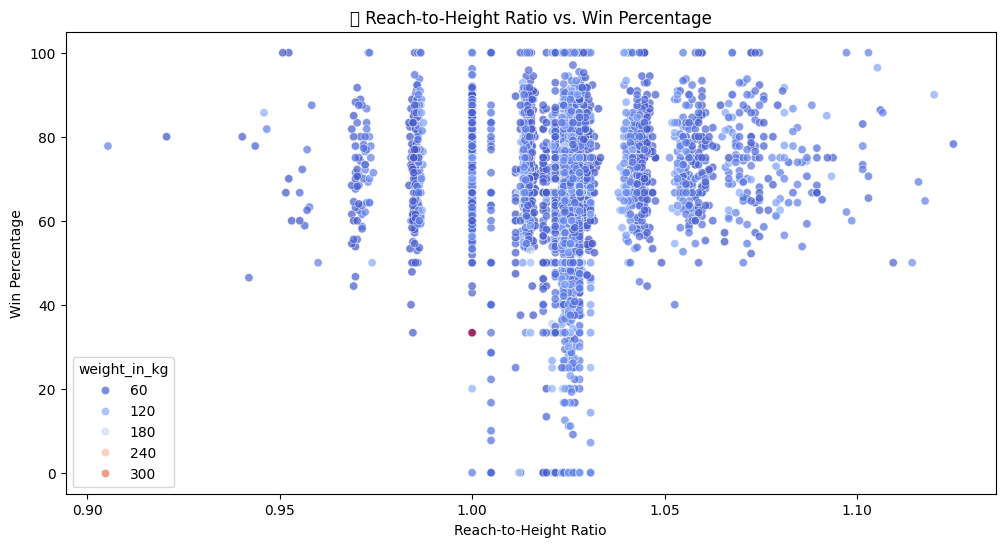

In [11]:
# Calculate reach-to-height ratio
df["reach_height_ratio"] = df["reach_in_cm"] / df["height_cm"]

plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["reach_height_ratio"], y=df["win_percentage"], hue=df["weight_in_kg"], alpha=0.7, palette="coolwarm")
plt.xlabel("Reach-to-Height Ratio")
plt.ylabel("Win Percentage")
plt.title("📏 Reach-to-Height Ratio vs. Win Percentage")
plt.show()   # creating a scatterplot to shpw whether reach to height ratio impacts win percentage

Before testing my first hypotheses, I created a scatterplot to see the data and the findings suggest that there is no clear trend however, I will test this hypotheses again and in more detail to see if my findings will be more accurate.

C:\Users\seebi\AppData\Local\Temp\ipykernel_15344\1268604380.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weight_in_kg", y="wins", data=finishing_rates, palette="coolwarm")


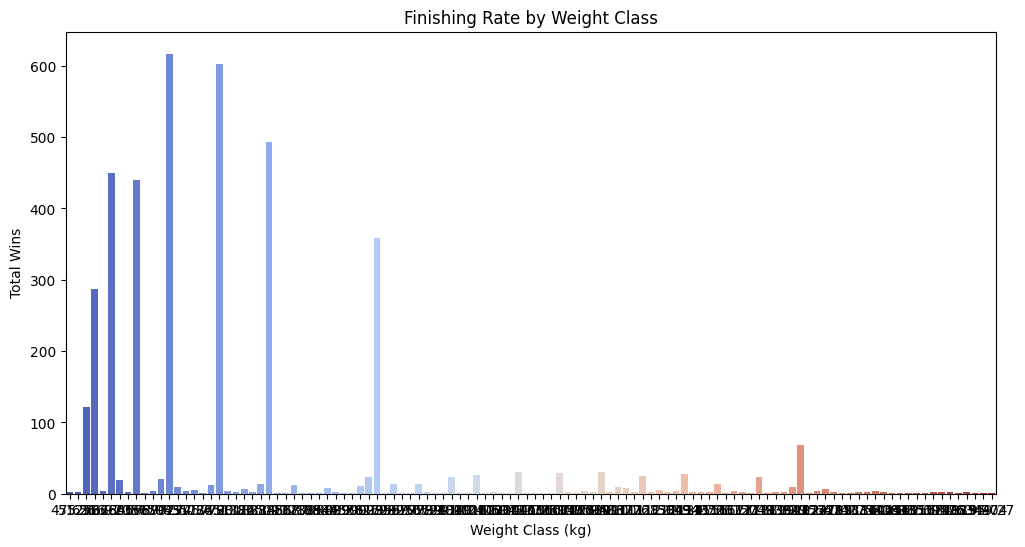

In [12]:
finishing_rates = df.groupby("weight_in_kg")["wins"].count().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="weight_in_kg", y="wins", data=finishing_rates, palette="coolwarm")
plt.xlabel("Weight Class (kg)")
plt.ylabel("Total Wins")
plt.title("Finishing Rate by Weight Class")
plt.show()      # creating a barplot to show the rate of finishes within a fight per weight class to see which weight class gets finishes consistently


The findings suggest that the lower weight classes get more finishes however, higher total wins in a specific weight class do not necessarily indicate a higher finishing rate. Instead, this could be influenced by the number of fighters in that weight class or the total number of fights they participate in.

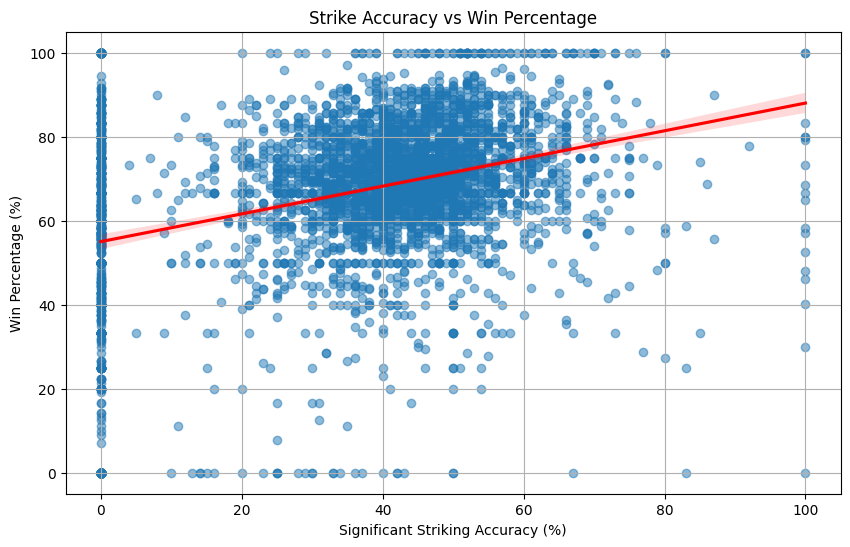

T-Test Results: t-statistic = 17.39, p-value = 0.0000
Conclusion: Statistically significant difference. Higher strike accuracy leads to higher win percentage.


In [13]:
from scipy.stats import ttest_ind

# Ensure required columns exist
if "significant_striking_accuracy" not in df.columns or "wins" not in df.columns or "losses" not in df.columns:
    raise ValueError("Required columns missing from dataset")

# Calculate win percentage
df["win_percentage"] = df["wins"] / (df["wins"] + df["losses"]) * 100

# Remove fighters with no recorded wins or losses
df = df.dropna(subset=["win_percentage", "significant_striking_accuracy"])

# Scatter plot with regression line to test my first hypotheses
plt.figure(figsize=(10, 6))
sns.regplot(x=df["significant_striking_accuracy"], y=df["win_percentage"], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Significant Striking Accuracy (%)")
plt.ylabel("Win Percentage (%)")
plt.title("Strike Accuracy vs Win Percentage")
plt.grid(True)
plt.show()

# Statistical Test: Split into high and low accuracy groups
median_accuracy = df["significant_striking_accuracy"].median()
high_accuracy = df[df["significant_striking_accuracy"] >= median_accuracy]["win_percentage"]
low_accuracy = df[df["significant_striking_accuracy"] < median_accuracy]["win_percentage"]

# Perform independent t-test
t_stat, p_value = ttest_ind(high_accuracy, low_accuracy, equal_var=False)

# Print statistical results
print(f"T-Test Results: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Conclusion: Statistically significant difference. Higher strike accuracy leads to higher win percentage.")
else:
    print("Conclusion: No significant difference found. Strike accuracy may not strongly impact win percentage.")

For my first hypotheses 'Fighters with a higher strike accuracy have a higher win percentage', I wanted to analyse the trend between this, and as you can see that the red slope above indicates that my hypotheses is correct.

Because the p-value is practically 0, we can infer from this data that striking accuracy plays a major role in winning fights, as this further suggests that fighters who are consistently landing precise strikes tend to have better win rates.

Some practical insights we can take from this can be that coaches & analysts can use accuracy stats when scouting potential fighters or devising strategies as a fighter with high accuracy but a low win rate might need better defense or endurance training to translate their accuracy into victories.

C:\Users\seebi\AppData\Local\Temp\ipykernel_15344\3184882242.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pd.qcut(df["significant_strikes_absorbed_per_minute"], q=3, labels=["Low Absorption", "Medium Absorption", "High Absorption"]),


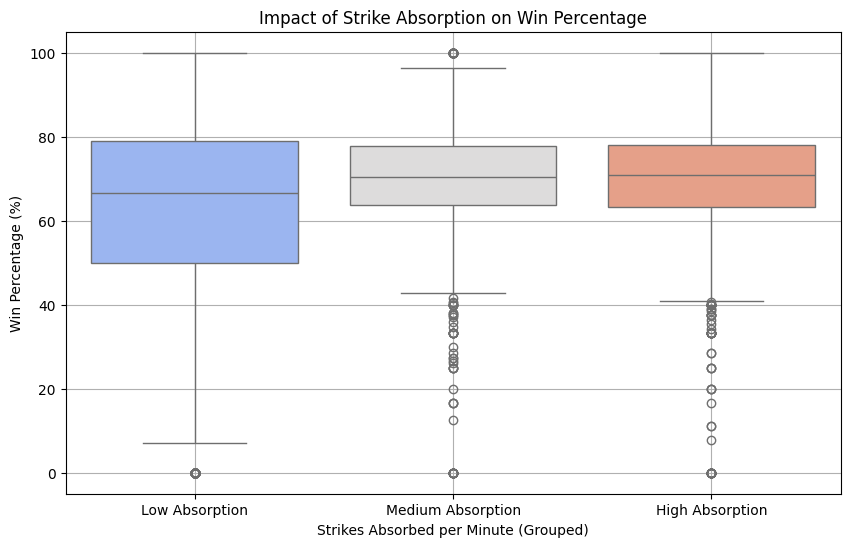

T-Test Results: t-statistic = -7.26, p-value = 0.0000
Conclusion: Statistically significant difference. Fighters who absorb fewer strikes have higher win rates.


In [14]:
# Calculate win percentage
df["win_percentage"] = df["wins"] / (df["wins"] + df["losses"]) * 100

# Remove NaN values
df = df.dropna(subset=["win_percentage", "significant_strikes_absorbed_per_minute"])

# Box plot of win percentage grouped by strike absorption level as we are testing my second hypotheses
plt.figure(figsize=(10, 6))
sns.boxplot(x=pd.qcut(df["significant_strikes_absorbed_per_minute"], q=3, labels=["Low Absorption", "Medium Absorption", "High Absorption"]),
            y=df["win_percentage"], palette="coolwarm")
plt.xlabel("Strikes Absorbed per Minute (Grouped)")
plt.ylabel("Win Percentage (%)")
plt.title("Impact of Strike Absorption on Win Percentage")
plt.grid(True)
plt.show()

# Statistical Test: Split into high and low absorption groups
median_absorption = df["significant_strikes_absorbed_per_minute"].median()
low_absorption = df[df["significant_strikes_absorbed_per_minute"] <= median_absorption]["win_percentage"]
high_absorption = df[df["significant_strikes_absorbed_per_minute"] > median_absorption]["win_percentage"]

# Perform independent t-test
t_stat, p_value = ttest_ind(low_absorption, high_absorption, equal_var=False)

# Print statistical results
print(f"T-Test Results: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Conclusion: Statistically significant difference. Fighters who absorb fewer strikes have higher win rates.")
else:
    print("Conclusion: No significant difference found. Absorbing fewer strikes does not strongly impact win percentage.")


From our second hypotheses 'Fighters who absorb fewer significant strikes per minute have better win rates'; We can see that it was proved correct as the p-value is also 0.

This can also infer that absorbing fewer significant strikes is strongly linked to winning fights, and this could be due to other factors such as footwork, better defence and head movement. We can also infer from this data that fighters with a high absorption rate of significant strikes may get overwhelmed which could lead to a higher rate of losses.

Some practical insights we can take from these findings can be that fighters who absorb more strikes but still win may have superior cardio, durability, or offensive pressure. Training should focus on a balanced approach rather than pure defense. Another insight could be for the coaches/analysts, if a fighter absorbs too many strikes but still wins, they may be at risk for long-term damage and career-shortening injuries.

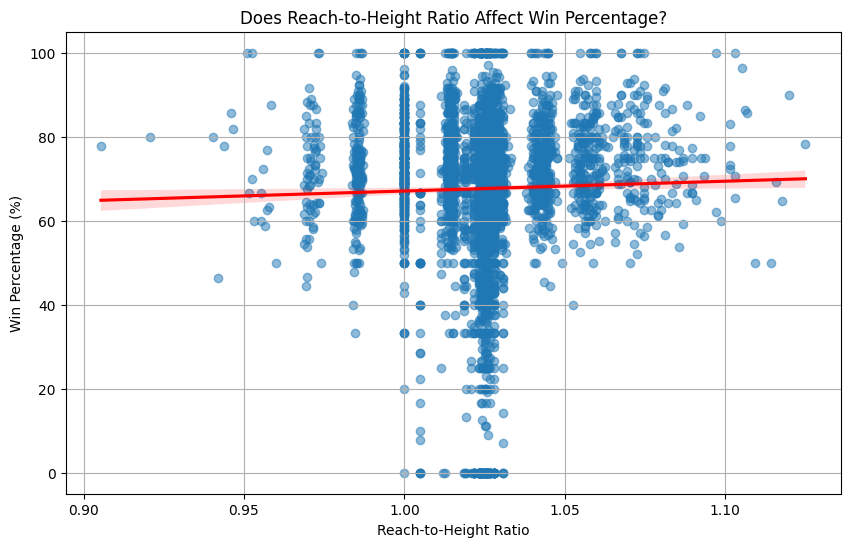

T-Test Results: t-statistic = 0.28, p-value = 0.7780
Conclusion: No significant difference found. Reach-to-height ratio may not strongly impact win percentage.


In [15]:
# Ensure required columns exist
if "reach_in_cm" not in df.columns or "height_cm" not in df.columns or "wins" not in df.columns or "losses" not in df.columns:
    raise ValueError("Required columns missing from dataset")

# Calculate reach-to-height ratio
df["reach_height_ratio"] = df["reach_in_cm"] / df["height_cm"]

# Calculate win percentage
df["win_percentage"] = df["wins"] / (df["wins"] + df["losses"]) * 100

# Remove NaN values
df = df.dropna(subset=["win_percentage", "reach_height_ratio"])

# Scatter plot with regression line to test our third hypotheses
plt.figure(figsize=(10, 6))
sns.regplot(x=df["reach_height_ratio"], y=df["win_percentage"], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Reach-to-Height Ratio")
plt.ylabel("Win Percentage (%)")
plt.title("Does Reach-to-Height Ratio Affect Win Percentage?")
plt.grid(True)
plt.show()

# Statistical Test: Split into high and low ratio groups
median_ratio = df["reach_height_ratio"].median()
high_ratio = df[df["reach_height_ratio"] >= median_ratio]["win_percentage"]
low_ratio = df[df["reach_height_ratio"] < median_ratio]["win_percentage"]

# Perform independent t-test
t_stat, p_value = ttest_ind(high_ratio, low_ratio, equal_var=False)

# Print statistical results
print(f"T-Test Results: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Conclusion: Statistically significant difference. Fighters with a higher reach-to-height ratio tend to have a higher win percentage.")
else:
    print("Conclusion: No significant difference found. Reach-to-height ratio may not strongly impact win percentage.")


Due to its p-value being 0.7780, we can infer from this data that my third hypotheses which was 'Fighters with a higher reach-to-height ratio tend to have a higher win percentage' was rejected which can explain that reach-to-height ratio does not significantly impact win percentage.

The findings also suggest that a longer reach relative to one's height does not automatically translate to winning fights, as other factors such as fight iq, experience, striking accuracy and speed can come into play and affect results.

Some practical insights we can consider from this data can be matchmakers may consider reach-to-height ratios when booking fights, as extreme differences could create stylistic mismatches.

C:\Users\seebi\AppData\Local\Temp\ipykernel_15344\2714530171.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["is_heavyweight"], y=df["win_percentage"], palette=["blue", "red"])


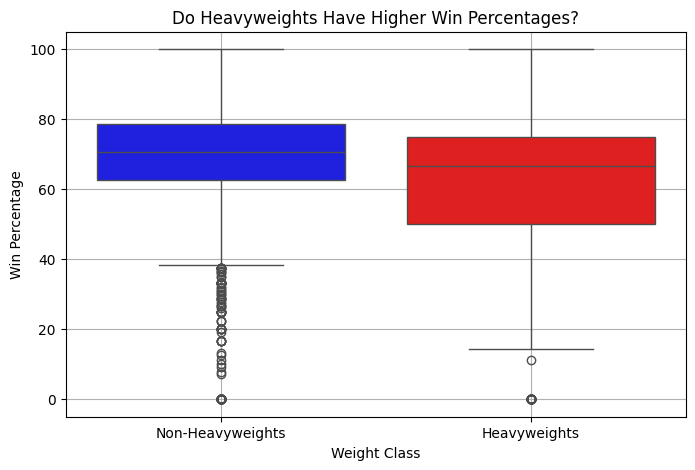

T-Test Results: t-statistic = -7.57, p-value = 0.0000
Conclusion: Statistically significant difference. Heavyweights have a lower win percentage.


In [16]:
if "weight_in_kg" not in df.columns or "win_percentage" not in df.columns:
    raise ValueError("Required columns missing from dataset")

# Define heavyweight (typically 93 kg and above in MMA)
df["is_heavyweight"] = df["weight_in_kg"] >= 93

# Boxplot to visualize win percentage differences
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["is_heavyweight"], y=df["win_percentage"], palette=["blue", "red"])
plt.xticks([0, 1], ["Non-Heavyweights", "Heavyweights"])
plt.xlabel("Weight Class")
plt.ylabel("Win Percentage")
plt.title("Do Heavyweights Have Higher Win Percentages?")
plt.grid(True)
plt.show()

# Statistical Test: Compare win percentages between heavyweights and non-heavyweights
heavyweights = df[df["is_heavyweight"]]["win_percentage"]
non_heavyweights = df[~df["is_heavyweight"]]["win_percentage"]

# Perform independent t-test
t_stat, p_value = ttest_ind(heavyweights, non_heavyweights, equal_var=False)

# Print statistical results
print(f"T-Test Results: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Conclusion: Statistically significant difference. Heavyweights have a lower win percentage.")
else:
    print("Conclusion: No significant difference found. Weight class does not significantly impact win percentage.")




The findings above from the T-test suggest that heavyweights have a lower win percentage and I came to this conclusion as the p-value is far below 0.05, this difference between heavyweight and non-heavyweights is stastically significant and not from random chance.

Reasons why this is possible could boil down to endurance and cardio issues, as heavyweights carry more mass and produce more mass, this leads to faster fatigue which is why most heavyweights struggle going the full 3/5 rounds when performing at their highest level as it takes more energy out of them compared to lighter fighters.

Another reason why this is true is because of their defensive vulnerabilities, as heavyweights absorb the more damaging strikes due to their division's high knockout rate and as they carry more mass, they also produce the most amount of damage; heavyweights also have slower reaction times and less mobility compared to lighter fighters making them easier targets for precise strikes.

Some practical insights we can conclude from these findings can be scouts can evaluate heavyweight prospects differently, prioritizing skill over pure size. Another insight could be that as heavyweights consistently have lower win percentages, their training should emphasize endurance, mobility, and technical skills to counteract disadvantages due to their mass.

C:\Users\seebi\AppData\Local\Temp\ipykernel_15344\870108106.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["high_takedown_defense"], y=df["win_percentage"], palette=["blue", "red"])


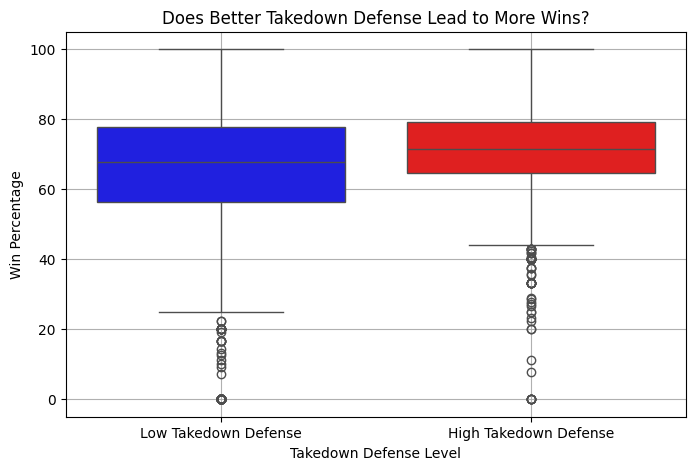

T-Test Results: t-statistic = 12.96, p-value = 0.0000
Conclusion: Statistically significant difference. Fighters with better takedown defense have a higher win percentage.


In [17]:
# Split fighters into high and low takedown defense groups
median_takedown_defense = df["takedown_defense"].median()
df["high_takedown_defense"] = df["takedown_defense"] >= median_takedown_defense

# Boxplot to visualize win percentage differences
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["high_takedown_defense"], y=df["win_percentage"], palette=["blue", "red"])
plt.xticks([0, 1], ["Low Takedown Defense", "High Takedown Defense"])
plt.xlabel("Takedown Defense Level")
plt.ylabel("Win Percentage")
plt.title("Does Better Takedown Defense Lead to More Wins?")
plt.grid(True)
plt.show()

# Statistical Test: Compare win percentages between high and low takedown defense groups
high_defense = df[df["high_takedown_defense"]]["win_percentage"]
low_defense = df[~df["high_takedown_defense"]]["win_percentage"]

# Perform independent t-test
t_stat, p_value = ttest_ind(high_defense, low_defense, equal_var=False)

# Print statistical results
print(f"T-Test Results: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Conclusion: Statistically significant difference. Fighters with better takedown defense have a higher win percentage.")
else:
    print("Conclusion: No significant difference found. Takedown defense does not significantly impact win percentage.")


The findings above support my fifth hypotheses which was 'fighters with better takedown defense have a significantly higher win percentage', and we can come to this conclusion from the results of the T-test as the p-value is below 0.05 which means that the difference is significant and it wasn't by random chance.

Reasons why this hypotheses is correct can be because a high takedown defense rate can lead to a tactical edge, as a fighter can lsoe confidence when repeated takedowns fail and they are able to force the fight standing up to which they could have an advantage over.

Another reason why this hypotheses is true is because they are conserving more energy, as defending takedowns successfully which means fighters don't expend unnecessary energy scrambling nor getting back up to their feet; this furthermore allows them to be more effective over multiple rounds and maintain control of the fight.

Some practical insights we can consider due to the findings can be that as high takedown defence leads to more wins, fighters should prioritize wrestling and defensive grappling drills to prevent being controlled on the ground. Another insight could be that fighters may adjust their styles to focus more on wrestling-based game plans to remain competitive against other wrestlers.



---

# Conclusion and Next Steps

This analysis explored key factors influencing MMA fight outcomes, testing five hypotheses related to reach, striking accuracy, defensive ability, weight class performance, and takedown defense. The findings revealed that a higher reach-to-height ratio does not significantly impact win percentage, suggesting that reach alone is not a decisive advantage without complementary skills like footwork and technique. However, strike accuracy showed a strong positive correlation with winning, emphasizing the importance of precision over sheer volume. Similarly, fighters who absorb fewer strikes per minute tend to win more often, highlighting that effective defense is just as crucial as offensive capability. When examining weight classes, heavyweights were found to have a lower win rate compared to lighter fighters, likely due to cardio limitations, slower movement, and higher damage absorption. Lastly, fighters with strong takedown defense had a significantly higher win percentage, reinforcing the importance of controlling where the fight takes place.

To expand on these insights, further analysis could focus on striking efficiency by comparing significant strikes landed with win rate, as well as contrasting knockout specialists with volume strikers to determine which approach yields better success. Additionally, a style-based analysis could compare the win rates of different fighting styles, such as strikers versus wrestlers, to understand whether grapplers benefit more from strong takedown defense than striking-based fighters. Breaking down weight class performance further could provide insights into finishing rates and defensive trends across divisions. Finally, leveraging machine learning for fight predictions could be a valuable next step, allowing for the development of a model that predicts fight outcomes based on key statistical features. Ultimately, this study confirms that while physical attributes like reach may offer an advantage, skill execution—particularly in accuracy, defense, and takedown control—is the most crucial factor in determining success in a MMA fight.